# Workshop semaine de l'IA: implémenter un réseau de neurones _from scratch_

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Fonctionnement d'un neurone

Sigmoid

In [2]:
def sigmoid(z):
    return 1 / ( 1 + math.exp(-z))

Classe représentant un neurone

In [3]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = np.array(bias)
        
    def forward(self, input_values):
        input_values = np.array(input_values)
        a = np.dot(self.weights.T, input_values) + self.bias
        return sigmoid(a)

In [4]:
w = [0.5, 0.9, 0.3]
b = 0

n = Neuron(w, b)

In [5]:
inputs =[0.6, 0.7, 0.8]
n.forward(inputs)

0.7631450157268554

## 2. Fonctionnement d'un réseau de base: résoudre XOR

Plusieurs neurones interconnectées

In [20]:
def generate_XOR_data():
    # génération de données aléatoires
    cov = np.matrix([[0.03, 0], [0, 0.03]])
    top_right_blob = np.random.multivariate_normal([1, 1], cov, 100)
    bottom_left_blob = np.random.multivariate_normal([0, 0], cov, 100)
    class_0_points = np.append(top_right_blob, bottom_left_blob, axis=0)
    class_0_points = np.append(class_0_points, np.zeros((200, 1)), axis=1)

    top_left_blob = np.random.multivariate_normal([0, 1], cov, 100)
    bottom_right_blob = np.random.multivariate_normal([1, 0], cov, 100)
    class_1_points = np.append(top_left_blob, bottom_right_blob, axis=0)
    class_1_points = np.append(class_1_points, np.ones((200, 1)), axis=1)

    points = np.append(class_0_points, class_1_points, axis=0)
    return points

points = generate_XOR_data()

Visualisation des données pour XOR

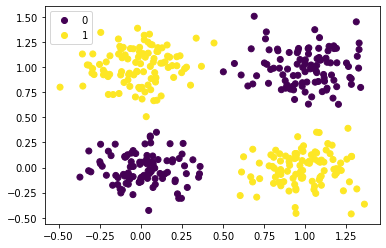

In [21]:
# Plot
scatter = plt.scatter(points[:,0], points[:,1], c=points[:,2])
plt.legend([*scatter.legend_elements()[0]], ["0", "1"])
plt.show()

In [22]:
pd.DataFrame(data=points[:,:], columns=["x", "y", "class"])

,x,y,class
0,1.188925,1.187291,0.0
1,0.999931,1.072298,0.0
2,0.847542,1.076483,0.0
3,1.128486,0.771064,0.0
4,0.984481,0.996445,0.0
...,...,...,...
395,0.851195,-0.182198,1.0
396,0.818096,-0.095120,1.0
397,1.055746,0.083450,1.0
398,1.083976,0.348115,1.0


In [23]:
def predict_class(x, y):
    
    # neuron_1 = Neuron([??, ??], ???)
    # neuron_2 = Neuron([??, ??], ???)
    # neuron_out = Neuron([???, ??], ???)
    
    # first layer
    a_1 = neuron_1.forward([x, y])
    a_2 = neuron_2.forward([x, y])
    
    # output layer
    out = neuron_out.forward([a_1, a_2])
    
    return out
    
    return 0

In [24]:
def predict_class(x, y):
    
    neuron_1 = Neuron([20, 20], -30)
    neuron_2 = Neuron([20, 20], -10)
    neuron_out = Neuron([-20, 20], -10)
    
    # first layer
    a_1 = neuron_1.forward([x, y])
    a_2 = neuron_2.forward([x, y])
    
    # output layer
    out = neuron_out.forward([a_1, a_2])
    
    return out

In [25]:
def get_accuracy(data):
    n_correct_preds = 0
    for point in data:
        x, y, label = point[0], point[1], point[2]

        pred = predict_class(x, y)
        if pred < 0.5:
            pred = 0
        else:
            pred = 1
        if pred == label:
            n_correct_preds += 1
    return 100 * n_correct_preds / len(data)

In [26]:
get_accuracy(points)

97.5

## 3. L'entraînement d'un réseau de neurones

Descente de gradient